# Data manipulation with pandas

## Introduction

Data exploration and feature engineering are crucial for successfully deriving actionable insights from data. We will work with some tips and tricks using the [pandas](https://pandas.pydata.org/) library. Python is gaining popularity and `pandas` is one of the most popular tools for data handling in Python.


In [36]:
import pandas as pd
import numpy as np
data = pd.read_csv("./data/loan-train.csv", index_col="Loan_ID")

## 0. First look at the data

In [37]:
print(data.shape)
data.columns

(614, 12)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
data.head()

Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             360.0   

          Credit_History Property_Area Loan_Status  
Loan_ID                                             
LP001002             1.0         Urban           Y  
LP001003             1.0         Rural           N  
LP001005             1.0         Urban           Y  
LP001006             1.0         Urban           Y  
LP001008             1.0         Urban           Y

In [39]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


## 1. Boolean Indexing

Useful for indexing a set of column using another set of columns. For instance, we can get a list of all women who are not graduate and got a loan using the following code.

In [41]:
data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

Gender     Education Loan_Status
Loan_ID                                   
LP001155  Female  Not Graduate           Y
LP001669  Female  Not Graduate           Y
LP001692  Female  Not Graduate           Y
LP001908  Female  Not Graduate           Y
LP002300  Female  Not Graduate           Y
LP002314  Female  Not Graduate           Y
LP002407  Female  Not Graduate           Y
LP002489  Female  Not Graduate           Y
LP002502  Female  Not Graduate           Y
LP002534  Female  Not Graduate           Y
LP002582  Female  Not Graduate           Y
LP002731  Female  Not Graduate           Y
LP002757  Female  Not Graduate           Y
LP002917  Female  Not Graduate           Y

More: http://pandas.pydata.org/pandas-docs/stable/indexing.html

## 2. Changing data types

Someties the data is imported in a format different from what we expected.

In [42]:
#Check current type:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we see that `Credit_History` is a nominal variable but appearing as float. We use the `astype` method to change the type.

In [43]:
data['Credit_History'] = data['Credit_History'].astype(str)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 62.4+ KB


Now the credit history column is modified to 'object' type which is used for representing nominal variables in Pandas.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows

## 3. Apply Function

It is one of the most handy functions when it comes to playing with the data, specially creating new varaibles. As the name suggests, apply returns some value after passing each row/column of a dataframe through some function. The function can be both default or user-defined.

For instance, here it can be used to find the number of missing values in each row and column.

In [45]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data.apply(num_missing, axis=0))  #axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nMissing values per row:")
print(data.apply(num_missing, axis=1).head())  #axis=1 defines that function is to be applied on each column

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html#pandas.DataFrame.apply

# 4. Imputing missing values

`fillna()` is a very useful function handy in implementing very basic forms of imputation like updating missing values with the overall mean/mode/median of the column. Let's impute the `Gender`, `Married` and `Self_Employed` columns with there respective modes.

In [46]:
data[['Gender','Married','Self_Employed']] = data[['Gender','Married','Self_Employed']].apply(lambda row: row.astype(str))

In [47]:
data.head()

Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             360.0   

         Credit_History Property_Area Loan_Status  
Loan_ID                                            
LP001002            1.0         Urban           Y  
LP001003            1.0         Rural           N  
LP001005            1.0         Urban           Y  
LP001006            1.0         Urban           Y  
LP001008            1.0         Urban           Y

In [48]:
#First we import a function to determine the mode
from scipy.stats import mode

In [49]:
set(data['Gender'])

{'Female', 'Male', 'nan'}

In [50]:
mode(['Female','Male','Female',np.nan])

C:\Users\pablo\Anaconda3\envs\cnb\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array(['Female'], dtype='<U6'), count=array([2]))

In [51]:
mode(['Female','Male','Female',np.nan]).mode[0]

C:\Users\pablo\Anaconda3\envs\cnb\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Female'

In [52]:
mode(data['Gender'])

C:\Users\pablo\Anaconda3\envs\cnb\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

This returns both mode and count. Remember that mode can be an array as there can be multiple values with high frequency. We will take the first one by default always using:

In [53]:
mode(data['Gender']).mode[0]

C:\Users\pablo\Anaconda3\envs\cnb\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Male'

Now we can fill the missing values and check using technique #3.

In [54]:
#Impute the values:
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)

#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


C:\Users\pablo\Anaconda3\envs\cnb\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [55]:
data.head()

Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             360.0   

         Credit_History Property_Area Loan_Status  
Loan_ID                                            
LP001002            1.0         Urban           Y  
LP001003            1.0         Rural           N  
LP001005            1.0         Urban           Y  
LP001006            1.0         Urban           Y  
LP001008            1.0         Urban           Y

Hence confirmed the missing values are imputed. Note: This is the most primitive forms of imputation. There are many more sophisticated techniques include modeling the missing values.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

## 5. Grouping and Pivoting Table

`pandas` can be used to create MS Excel style pivot tables. For instance, in this case a very key column is `LoanAmount` which has missing values. We can impute it using mean amount of each `Gender`, `Married` and `Self_Employed` group. The mean `LoanAmount` of each group can be determined as:

In [56]:
#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)

In [57]:
impute_grps

LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
               nan            157.000000
       Yes     No             135.480000
               Yes            282.250000
               nan            118.500000
       nan     No                    NaN
Male   No      No             128.137255
               Yes            173.625000
               nan            166.142857
       Yes     No             151.709220
               Yes            169.355556
               nan            151.437500
       nan     No             159.000000
nan    No      No              95.000000
               Yes            292.000000
       Yes     No             245.571429
               Yes            170.000000

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table

## 6. MultiIndexing

If you notice the output of the previous step, it has a peculiar property: Each index is made of a combination of 3 values! This is called MultuIndexing and it can be used to perform some operations really fast if used wisely. Continuing the example, we have the values for each group but not they have to be imputed.

This can be done using the various techniques learned till now.

In [58]:
#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            1
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


Note:
- Multi-index require tuple for defining groups of indices in the `loc` statement.
- The .values[0] suffix is required because by defualt a series element is returned which has an index not matching with that of the dataframe. So direct assignment gives an error.

# 7. Crosstab

This function can be used to get an initial "feel" of the data. We can validate some basic hypothesis. For instance, in this case `Credit_History` is expected to affect the loan status significantly. This can be tested using a cross-tabulation as:

In [59]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0              97  378  475
nan              13   37   50
All             192  422  614

These are absolute numbers but percentages can be more intuitive in making some quick insights. 

**How can we get percentages**? We can do this using the apply function:

In [60]:
def percConvert(ser):
    return np.round(ser/float(ser[-1])*100,2)
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status         N      Y    All
Credit_History                     
0.0             92.13   7.87  100.0
1.0             20.42  79.58  100.0
nan             26.00  74.00  100.0
All             31.27  68.73  100.0

From here we see that people with a credit history have much higher chances of getting a loan as 80% people with credit history got a loan as compared to only 8% without credit history.

More: http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.crosstab.html

## 8. Merge DataFrames

Merging dataframes becomes essential when we have information coming from different sources which is to be collated. Consider a hypothetical case where the average property rates (CZK per square meter) is available for different property types. Let's define a dataframe as:

In [61]:
prop_val = pd.DataFrame([10000, 50000, 120000], index=['Rural','Semiurban','Urban'],columns=['Property_Value'])
prop_val

Property_Value
Rural               10000
Semiurban           50000
Urban              120000

Now we can merge this information with the original dataframe as:

In [62]:
data_merged = data.merge(right=prop_val, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','Property_Value'], aggfunc=len)

Credit_History
Property_Area Property_Value                
Rural         10000                      179
Semiurban     50000                      233
Urban         120000                     202

The pivot table validates sucessful merge operation. Note that the 'values' argument is irrelevant here because we are simply counting the values.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html#pandas.DataFrame.merge

## 9. Sorting DataFrames

Pandas allows easy sorting based on multiple columns. This can be done as:

In [63]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

ApplicantIncome  CoapplicantIncome
Loan_ID                                     
LP002317            81000                0.0
LP002101            63337                0.0
LP001585            51763                0.0
LP001536            39999                0.0
LP001640            39147             4750.0
LP002422            37719                0.0
LP001637            33846                0.0
LP001448            23803                0.0
LP002624            20833             6667.0
LP001922            20667                0.0

Note: The Pandas "sort" function is now depricated and we should use "sort_values".

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

# 10. Plotting (Boxplot & Histogram)

Many of you might be unaware that boxplots and histograms can be directly plotted in Pandas and calling matplotlob separately is not necessary. It's just a 1-line command. For instance, if we want to compare the distribution of ApplicantIncome by Loan_Status:

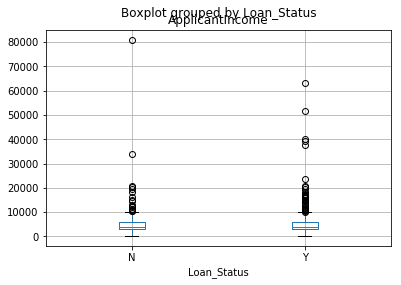

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F06F454AC8>,
      dtype=object)

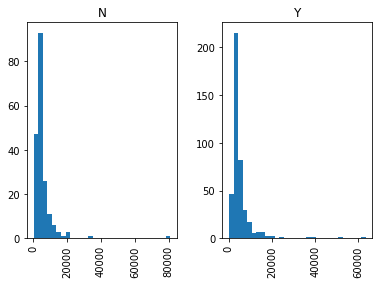

In [65]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas.DataFrame.hist | 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot

## 11. Cut function for binning

Sometimes numerical values make more sense if clustered together. For example, if we're trying to model traffic (number of cars on road) with time of the day (minutes)), the exact minute of an hour might not be that relevant for predicting traffic as compared to actual period of the day like "Morning", "Afternoon", "Evening", "Night", "Late Night". Modeling traffic this way will be more intuitive and will avoid overfitting minute details which practically make little sense.

Below we have a simple function which can be re-used for binning any variable fairly easily.

In [66]:
#Binning:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()
    
    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]
    
    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)
    
    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print(pd.value_counts(data["LoanAmount_Bin"], sort=False))

low          104
medium       271
high         147
very high     91
Name: LoanAmount_Bin, dtype: int64


More: http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.cut.html

# 12. Coding nominal data

Very often we come accross a case where we've to modify the categories of a nominal variable. This can be due to various reasons:

- Some algorithms (like Logistic Regression) require all inputs to be numeric. So nominal variables are mostly coded as 0---(n-1). This is called one-hot encoding.
-  Sometimes the same category might be represented in 2 ways. For eg temperature might be recorded as "High", "Medium", "Low", "H", "low". Here, both "High" and "H" refer to same category. Similarly, in "Low" and "low" there is only a difference of case.
- Some categories might have very low frequencies and its generally a good idea to combine them

Let's have a generic function which takes in input as a dictionary and codes the values using 'replace' function in `pandas`.

In [67]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

#Coding LoanStatus as Y=1, N=0:
print('Before Coding:') 
print(pd.value_counts(data["Loan_Status"]))
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print('\nAfter Coding:')
print(pd.value_counts(data["Loan_Status_Coded"]))

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


Similar counts before and after proves the coding.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html#pandas.DataFrame.replace

## End Notes:

We covered various functions of Pandas which can make our life easy while performing data exploration and feature engineering. Also, we defined some generic functions which can be reused for acheiving similar objective on different datasets.